# Doctor's Consultation Fees Prediction

We have all been in situation where we go to a doctor in emergency and find that the consultation fees are too high. We have to build a model to predict the doctor’s consulting fee. 

These are some important columns in the dataset that help us to build the model:-
>Qualification

>Experience

>Rating

>Profile

>Miscellaneous_Info

>Fees

>Place

In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import joblib
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from scipy.stats import zscore
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('doctor_train.csv')
df

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ?250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5957,MBBS,33 years experience,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100


In [3]:
#checking the data dimensions
df.shape

(5961, 7)

In [4]:
#checking the columns in the dataset
df.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info', 'Fees'],
      dtype='object')

In [5]:
#checking the datatypes of each column
df.dtypes

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
Fees                   int64
dtype: object

>we can see through above observation that this dataset has almost all the columns in object datatypes. 

>Only fees column has int datatypes

In [6]:
#checking the information regarding the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 186.3+ KB


In [7]:
#checking the null values in each column of the dataset
df.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

<AxesSubplot:>

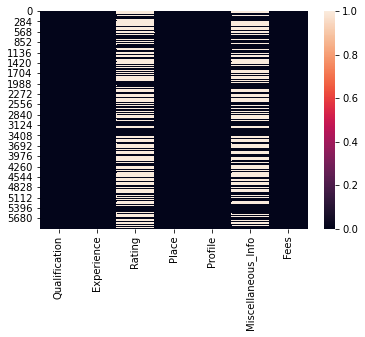

In [8]:
sns.heatmap(df.isnull())

>As we see from the above 2 observations that their are null values present in the dataset.

>Handling the Null value present in the dataset

In [9]:
df['Rating'] = df['Rating'].fillna(df['Rating'].mode()[0])

In [10]:
df['Place'] = df['Place'].fillna(df['Place'].mode()[0])

In [11]:
df['Miscellaneous_Info'] = df['Miscellaneous_Info'].fillna(df['Miscellaneous_Info'].mode()[0])

In [12]:
df.isnull().sum()

Qualification         0
Experience            0
Rating                0
Place                 0
Profile               0
Miscellaneous_Info    0
Fees                  0
dtype: int64

>As we see now all the null values are removed from the dataset

### Visualization of the data

<AxesSubplot:>

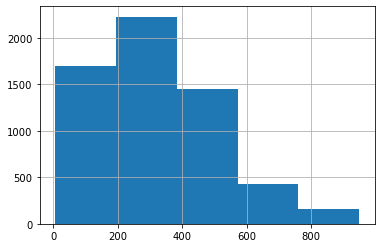

In [13]:
df['Fees'].hist(bins=5)

>We can see through the above graph that majority of the doctors charge a fee from the range of 200-400.

In [14]:
df['Qualification'].unique()

array(['BHMS, MD - Homeopathy', 'BAMS, MD - Ayurveda Medicine',
       'MBBS, MS - Otorhinolaryngology', ...,
       'MD - Dermatology , Venereology & Leprosy, MBBS, Fellowship In Dermatosurgery',
       'BDS, certification in smile designing',
       'MD - Homeopathy, Post Graduate Diploma in Healthcare Management(PGDHM), DHMS (Diploma in Homeopathic Medicine and Surgery)'],
      dtype=object)

>From the above stats we can see that their are many qualication through which you became a doctor in different field of medical

In [15]:
df['Experience'].unique()


array(['24 years experience', '12 years experience', '9 years experience',
       '20 years experience', '8 years experience', '42 years experience',
       '10 years experience', '14 years experience',
       '23 years experience', '5 years experience', '7 years experience',
       '21 years experience', '19 years experience',
       '41 years experience', '31 years experience',
       '25 years experience', '16 years experience',
       '15 years experience', '11 years experience',
       '22 years experience', '38 years experience', '6 years experience',
       '36 years experience', '13 years experience',
       '18 years experience', '46 years experience',
       '40 years experience', '49 years experience',
       '33 years experience', '0 years experience', '27 years experience',
       '30 years experience', '52 years experience',
       '60 years experience', '26 years experience',
       '35 years experience', '34 years experience',
       '39 years experience', '32 years exp

>From the above stats we can see that minimum experience that a doc have in this dataset is 0 years and maximum experience that a doctor have in this dataset is 65 years.

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Homeopath'),
  Text(1, 0, 'Ayurveda'),
  Text(2, 0, 'ENT Specialist'),
  Text(3, 0, 'Dentist'),
  Text(4, 0, 'General Medicine'),
  Text(5, 0, 'Dermatologists')])

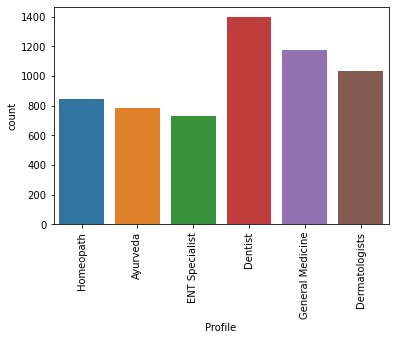

In [16]:
sns.countplot(df['Profile']) 
plt.xticks(rotation=90)

>As we see from the above graph that there are 6 profile of doctors available in the dataset.

>The more number of doctors are dentist in the dataset.

<AxesSubplot:xlabel='Profile'>

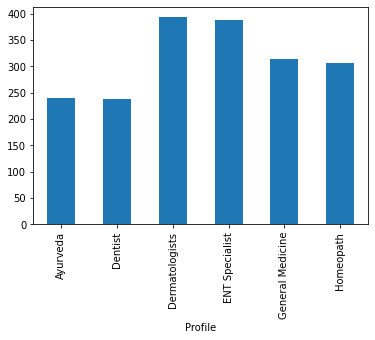

In [17]:
df.groupby('Profile')['Fees'].mean().plot.bar()

>From the above graph we can see that 'Dermatologists' and 'ENT Specialists' are taking more fees than any other profile of doctors.

In [18]:
df['Place'].unique()

array(['Kakkanad, Ernakulam', 'Whitefield, Bangalore',
       'Mathikere - BEL, Bangalore', 'Bannerghatta Road, Bangalore',
       'Keelkattalai, Chennai', 'Porur, Chennai', 'Karol Bagh, Delhi',
       'Arekere, Bangalore', 'Old City, Hyderabad', 'Athani, Ernakulam',
       'Thousand Lights, Chennai', 'Somajiguda, Hyderabad',
       'Coimbatore Racecourse, Coimbatore', 'Jubilee Hills, Hyderabad',
       'Kondli, Delhi', 'Saroor Nagar, Hyderabad',
       'Tambaram West, Chennai', 'Purasawakkam, Chennai',
       'KPHB, Hyderabad', 'HSR Layout, Bangalore', 'Pollachi, Coimbatore',
       'Vasundhra Enclave, Delhi', 'Chembur, Mumbai',
       'Thammanam, Ernakulam', 'Andheri, Mumbai',
       'Pattom, Thiruvananthapuram', 'Kukatpally, Hyderabad',
       'Vadavalli, Coimbatore', 'Defence Colony, Delhi',
       'Banjara Hills, Hyderabad', 'Sion West, Mumbai', 'CR Park, Delhi',
       'Mogappair East, Chennai', 'IP Extension, Delhi',
       'Safdarjung Enclave, Delhi', 'New Friends Colony, Delhi

>From the above stats we can see that this dataset has doctors from variety of places of many cities in India.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
 [Text(0, 0, '100%'),
  Text(1, 0, '33%'),
  Text(2, 0, '36%'),
  Text(3, 0, '40%'),
  Text(4, 0, '45%'),
  Text(5, 0, '47%'),
  Text(6, 0, '48%'),
  Text(7, 0, '53%'),
  Text(8, 0, '55%'),
  Text(9, 0, '56%'),
  Text(10, 0, '57%'),
  Text(11, 0, '58%'),
  Text(12, 0, '60%'),
  Text(13, 0, '62%'),
  Text(14, 0, '63%'),
  Text(15, 0, '64%'),
  Text(16, 0, '65%'),
  Text(17, 0, '67%'),
  Text(18, 0, '68%'),
  Text(19, 0, '69%'),
  Text(20, 0, '7%'),
  Text(21, 0, '70%'),
  Text(22, 0, '71%'),
  Text(23, 0, '72%'),
  Text(24, 0, '73%'),
  Text(25, 0, '74%'),
  Text(26, 0, '75%'),
  Text(27, 0, '76%'),
  Text(28, 0, '77%'),
  Text(29, 0, '78%'),
  Text(30, 0, '79%'),
  Text(31, 0, '80%'),
  Text(32, 0, '81%'),
  Text(33, 0, '82%'),
  Text(34, 0, '83%'),
  Text(35,

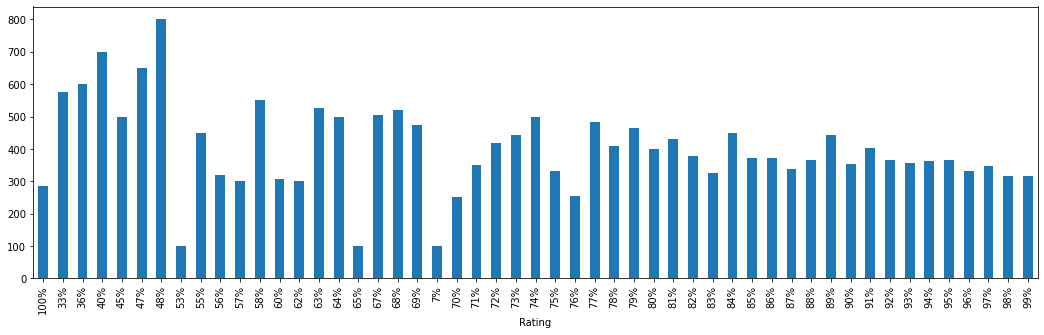

In [19]:
df.groupby('Rating')['Fees'].mean().plot.bar(figsize=(18,5))
plt.xticks(rotation=90)

>From the above we can see that the doctors who are getting the rating of 48% are charging highest fees. 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63]),
 [Text(0, 0, '24 years experience'),
  Text(1, 0, '12 years experience'),
  Text(2, 0, '9 years experience'),
  Text(3, 0, '20 years experience'),
  Text(4, 0, '8 years experience'),
  Text(5, 0, '42 years experience'),
  Text(6, 0, '10 years experience'),
  Text(7, 0, '14 years experience'),
  Text(8, 0, '23 years experience'),
  Text(9, 0, '5 years experience'),
  Text(10, 0, '7 years experience'),
  Text(11, 0, '21 years experience'),
  Text(12, 0, '19 years experience'),
  Text(13, 0, '41 years experience'),
  Text(14, 0, '31 years experience'),
  Text(15, 0, '25 years experience'),
  Text(16, 0, '16 years experience'),
  Text(17, 0, '15 years experience'),
  Text(18, 0, '11 years experience'),
  

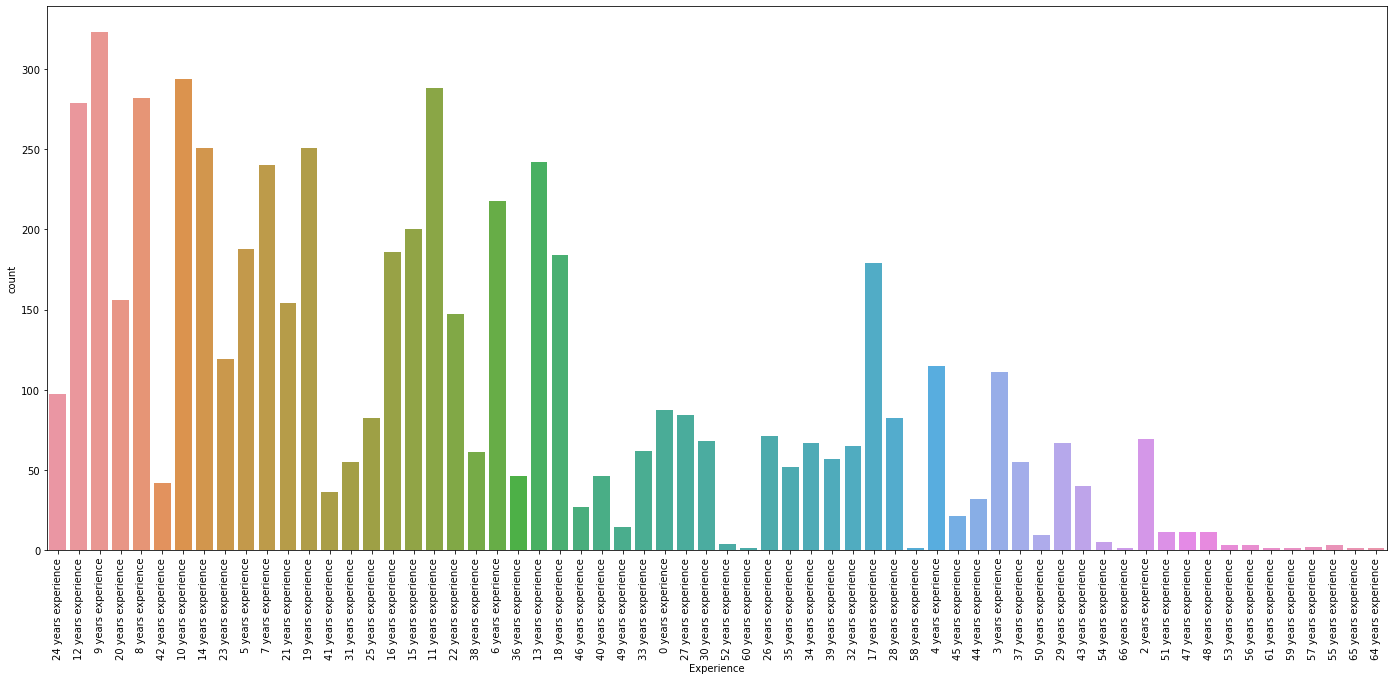

In [20]:
plt.figure(figsize=(24,10))
sns.countplot(df['Experience']) 
plt.xticks(rotation=90)

>From the above graph we can see that more number of doctors are having 9 years of experience.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63]),
 [Text(0, 0, '0 years experience'),
  Text(1, 0, '10 years experience'),
  Text(2, 0, '11 years experience'),
  Text(3, 0, '12 years experience'),
  Text(4, 0, '13 years experience'),
  Text(5, 0, '14 years experience'),
  Text(6, 0, '15 years experience'),
  Text(7, 0, '16 years experience'),
  Text(8, 0, '17 years experience'),
  Text(9, 0, '18 years experience'),
  Text(10, 0, '19 years experience'),
  Text(11, 0, '2 years experience'),
  Text(12, 0, '20 years experience'),
  Text(13, 0, '21 years experience'),
  Text(14, 0, '22 years experience'),
  Text(15, 0, '23 years experience'),
  Text(16, 0, '24 years experience'),
  Text(17, 0, '25 years experience'),
  Text(18, 0, '26 years experience'),


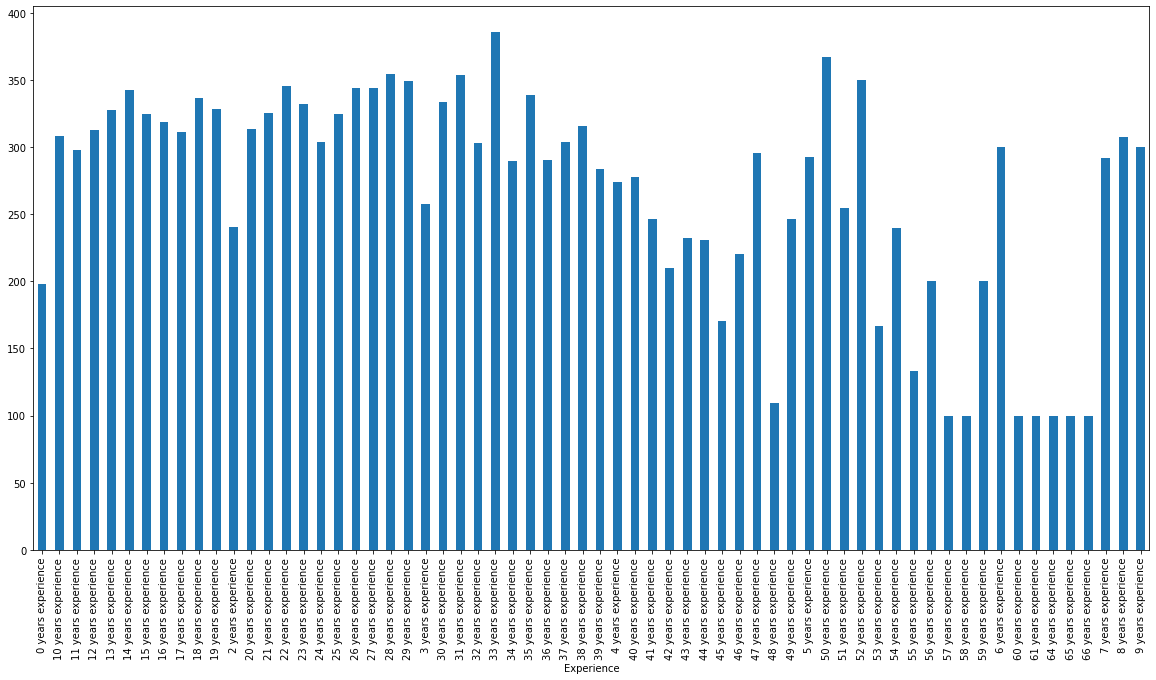

In [21]:
df.groupby('Experience')['Fees'].mean().plot.bar(figsize=(20,10))
plt.xticks(rotation=90)

>From the above graph we can see that the doctors which are having 33 years of experience are charging the highest fees.

In [22]:
df['Rating'] = list(map(lambda x: x[:-1], df['Rating'].values))

In [23]:
df['Rating'] = [float(x) for x in df['Rating'].values]

In [24]:
df

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100.0,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98.0,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,100.0,"Mathikere - BEL, Bangalore",ENT Specialist,Acrylic Partial Denture Crowns and Bridges Fix...,300
3,"BSc - Zoology, BAMS",12 years experience,100.0,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ?250 Available on...",250
4,BAMS,20 years experience,100.0,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,98.0,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5957,MBBS,33 years experience,100.0,"Nungambakkam, Chennai",General Medicine,Acrylic Partial Denture Crowns and Bridges Fix...,100
5958,MBBS,41 years experience,97.0,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,"MBBS, MD - General Medicine",15 years experience,90.0,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100


In [25]:
df.dtypes

Qualification          object
Experience             object
Rating                float64
Place                  object
Profile                object
Miscellaneous_Info     object
Fees                    int64
dtype: object

In [26]:
df

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100.0,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98.0,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,100.0,"Mathikere - BEL, Bangalore",ENT Specialist,Acrylic Partial Denture Crowns and Bridges Fix...,300
3,"BSc - Zoology, BAMS",12 years experience,100.0,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ?250 Available on...",250
4,BAMS,20 years experience,100.0,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,98.0,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5957,MBBS,33 years experience,100.0,"Nungambakkam, Chennai",General Medicine,Acrylic Partial Denture Crowns and Bridges Fix...,100
5958,MBBS,41 years experience,97.0,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,"MBBS, MD - General Medicine",15 years experience,90.0,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100


>We can observe that our dataset is now converted into numeric form.

array([[<AxesSubplot:title={'center':'Rating'}>,
        <AxesSubplot:title={'center':'Fees'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

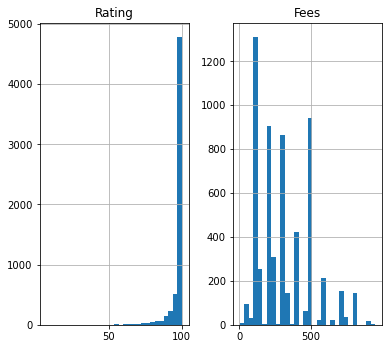

In [27]:
# Histogram to see the data distribution of all the columns
df.hist(figsize=(20,20), grid = True, layout = (3,6), bins = 30)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
 [Text(0, 0, '7.0'),
  Text(1, 0, '33.0'),
  Text(2, 0, '36.0'),
  Text(3, 0, '40.0'),
  Text(4, 0, '45.0'),
  Text(5, 0, '47.0'),
  Text(6, 0, '48.0'),
  Text(7, 0, '53.0'),
  Text(8, 0, '55.0'),
  Text(9, 0, '56.0'),
  Text(10, 0, '57.0'),
  Text(11, 0, '58.0'),
  Text(12, 0, '60.0'),
  Text(13, 0, '62.0'),
  Text(14, 0, '63.0'),
  Text(15, 0, '64.0'),
  Text(16, 0, '65.0'),
  Text(17, 0, '67.0'),
  Text(18, 0, '68.0'),
  Text(19, 0, '69.0'),
  Text(20, 0, '70.0'),
  Text(21, 0, '71.0'),
  Text(22, 0, '72.0'),
  Text(23, 0, '73.0'),
  Text(24, 0, '74.0'),
  Text(25, 0, '75.0'),
  Text(26, 0, '76.0'),
  Text(27, 0, '77.0'),
  Text(28, 0, '78.0'),
  Text(29, 0, '79.0'),
  Text(30, 0, '80.0'),
  Text(31, 0, '81.0'),
  Text(32, 0, '82.0'),
  Text(33, 0, '83.0'),

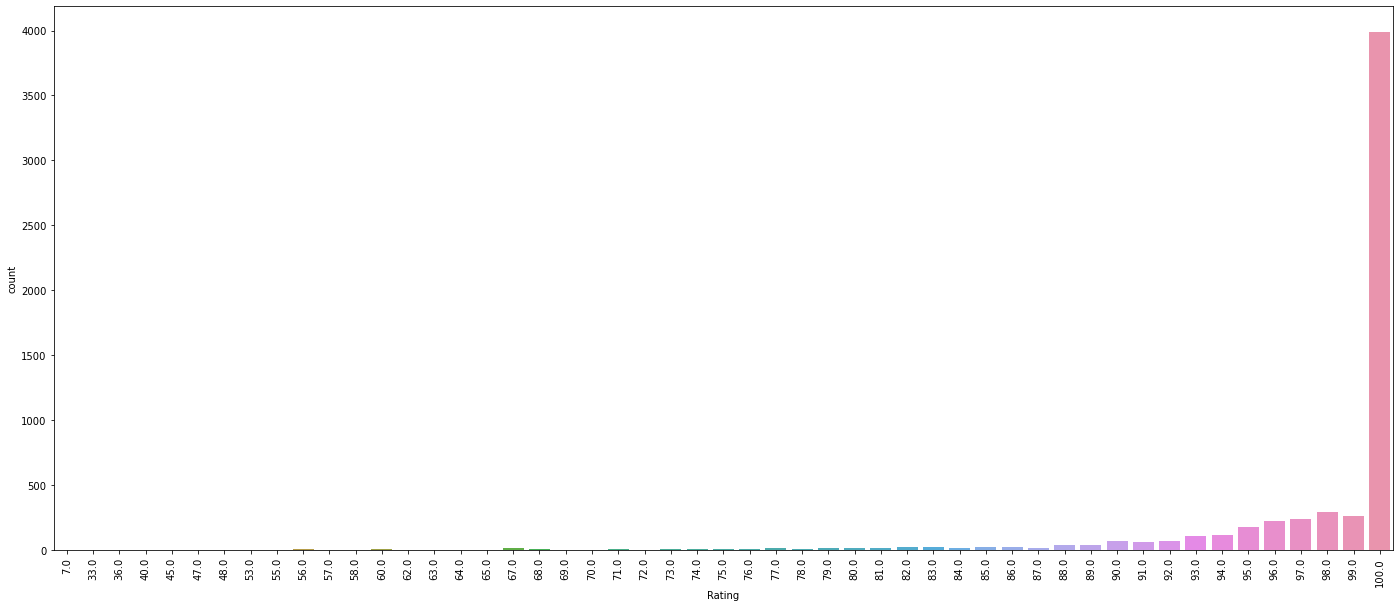

In [28]:
plt.figure(figsize=(24,10))
sns.countplot(df['Rating']) 
plt.xticks(rotation=90)

>From the above graph we can see that majority of the doctors are getting 100% rating.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
 [Text(0, 0, '7.0'),
  Text(1, 0, '33.0'),
  Text(2, 0, '36.0'),
  Text(3, 0, '40.0'),
  Text(4, 0, '45.0'),
  Text(5, 0, '47.0'),
  Text(6, 0, '48.0'),
  Text(7, 0, '53.0'),
  Text(8, 0, '55.0'),
  Text(9, 0, '56.0'),
  Text(10, 0, '57.0'),
  Text(11, 0, '58.0'),
  Text(12, 0, '60.0'),
  Text(13, 0, '62.0'),
  Text(14, 0, '63.0'),
  Text(15, 0, '64.0'),
  Text(16, 0, '65.0'),
  Text(17, 0, '67.0'),
  Text(18, 0, '68.0'),
  Text(19, 0, '69.0'),
  Text(20, 0, '70.0'),
  Text(21, 0, '71.0'),
  Text(22, 0, '72.0'),
  Text(23, 0, '73.0'),
  Text(24, 0, '74.0'),
  Text(25, 0, '75.0'),
  Text(26, 0, '76.0'),
  Text(27, 0, '77.0'),
  Text(28, 0, '78.0'),
  Text(29, 0, '79.0'),
  Text(30, 0, '80.0'),
  Text(31, 0, '81.0'),
  Text(32, 0, '82.0'),
  Text(33, 0, '83.0'),

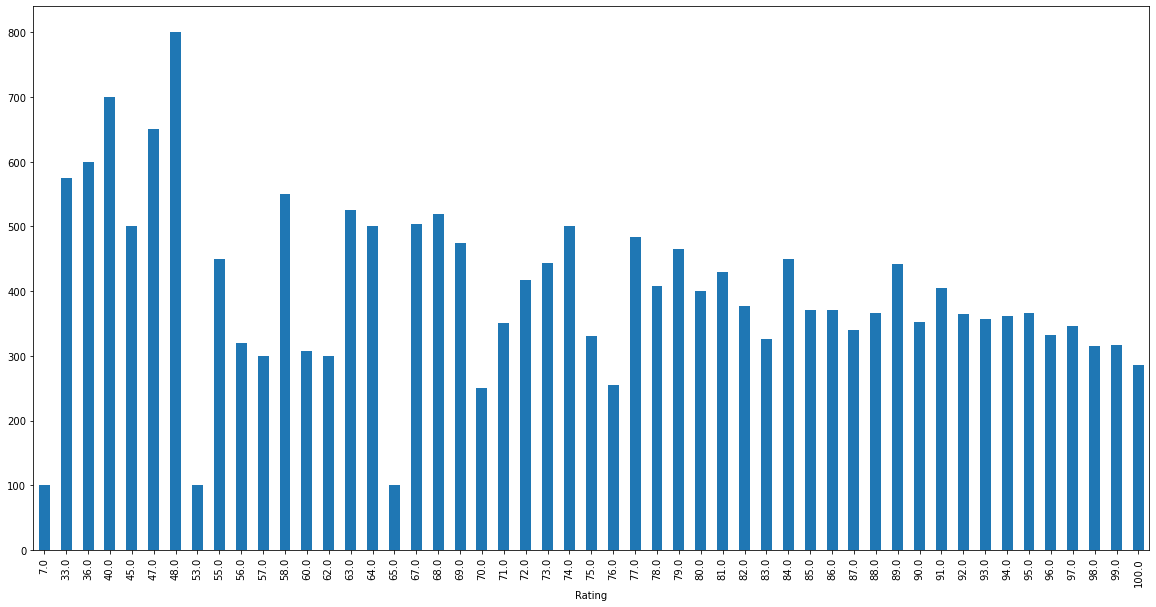

In [29]:
df.groupby('Rating')['Fees'].mean().plot.bar(figsize=(20,10))
plt.xticks(rotation=90)

>From the above we can see that the doctors who are getting 48% rating are charging highest fees.

In [30]:
df

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100.0,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98.0,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,100.0,"Mathikere - BEL, Bangalore",ENT Specialist,Acrylic Partial Denture Crowns and Bridges Fix...,300
3,"BSc - Zoology, BAMS",12 years experience,100.0,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ?250 Available on...",250
4,BAMS,20 years experience,100.0,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,98.0,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5957,MBBS,33 years experience,100.0,"Nungambakkam, Chennai",General Medicine,Acrylic Partial Denture Crowns and Bridges Fix...,100
5958,MBBS,41 years experience,97.0,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,"MBBS, MD - General Medicine",15 years experience,90.0,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100


In [31]:
enc=OrdinalEncoder()

for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [32]:
df

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,401.0,16.0,100.0,299.0,5.0,130.0,100
1,73.0,3.0,98.0,866.0,0.0,1422.0,350
2,1135.0,63.0,100.0,457.0,3.0,1595.0,300
3,464.0,3.0,100.0,68.0,0.0,1695.0,250
4,10.0,12.0,100.0,337.0,0.0,253.0,250
...,...,...,...,...,...,...,...
5956,1075.0,10.0,98.0,70.0,3.0,1385.0,300
5957,596.0,26.0,100.0,541.0,4.0,1595.0,100
5958,596.0,35.0,97.0,216.0,4.0,1173.0,600
5959,943.0,6.0,90.0,850.0,4.0,2202.0,100


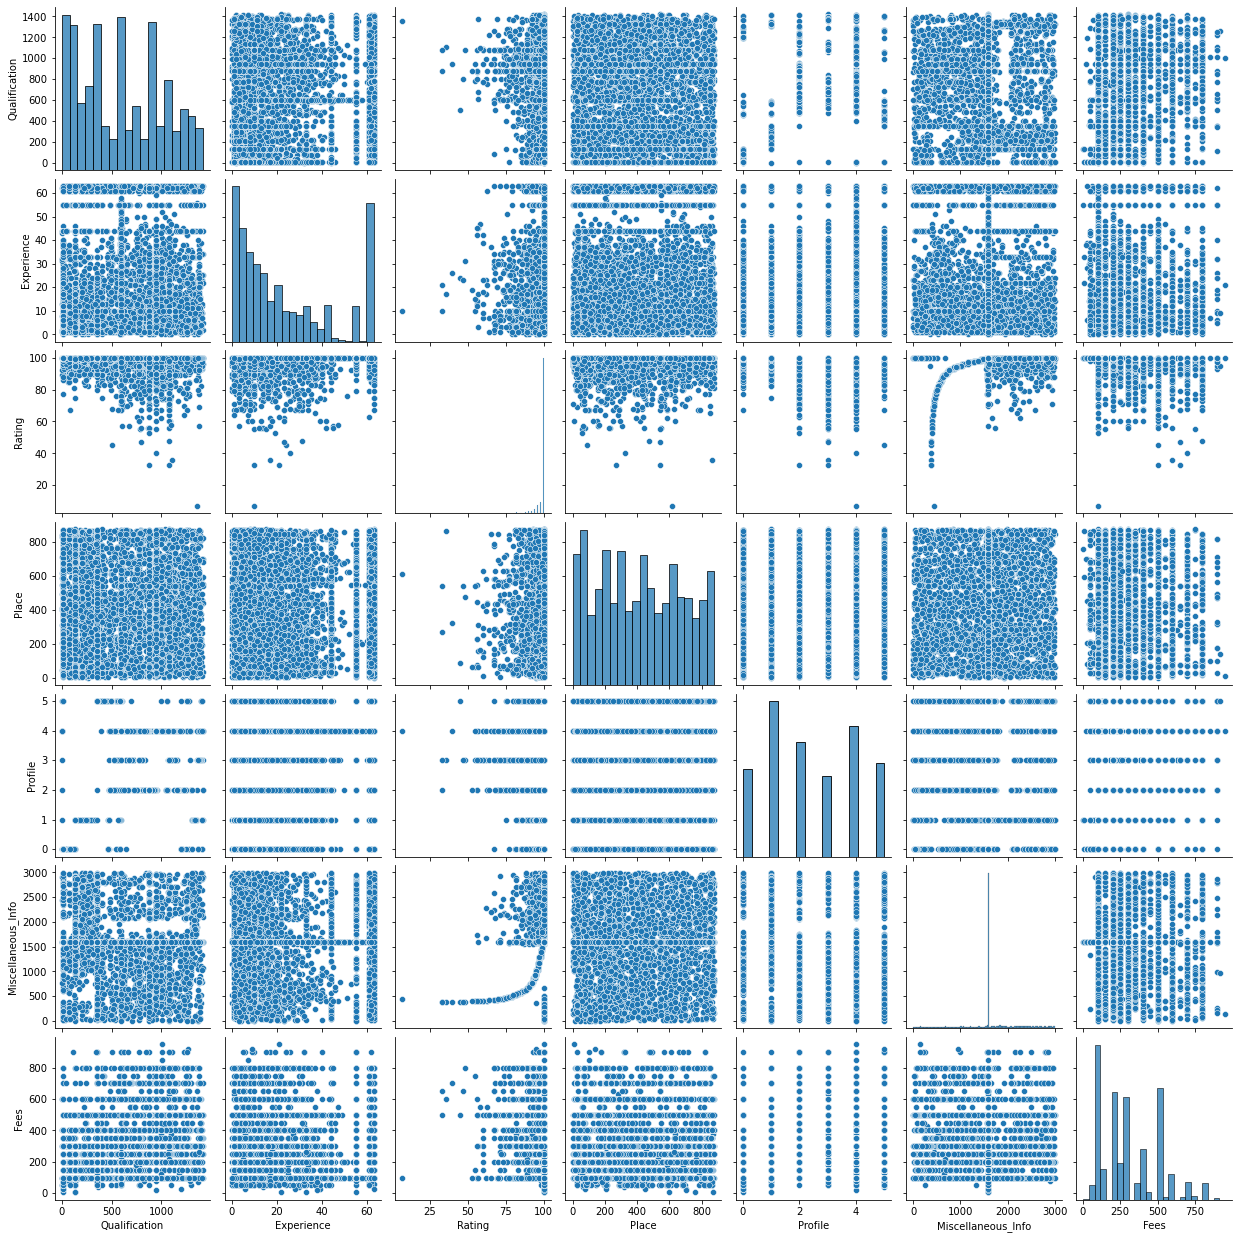

In [33]:
sns.pairplot(df)

In [34]:
df.describe()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
count,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000
mean,596.857574,23.010904,97.610636,414.368059,2.441872,1573.344238,307.944640
std,413.842446,20.937163,5.881539,258.547684,1.658014,640.388401,190.920373
min,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,5.000000
25%,219.000000,6.000000,98.000000,197.000000,1.000000,1477.000000,150.000000
50%,596.000000,15.000000,100.000000,407.000000,2.000000,1595.000000,300.000000
75%,943.000000,36.000000,100.000000,628.000000,4.000000,1746.000000,500.000000
max,1419.000000,63.000000,100.000000,876.000000,5.000000,2997.000000,950.000000


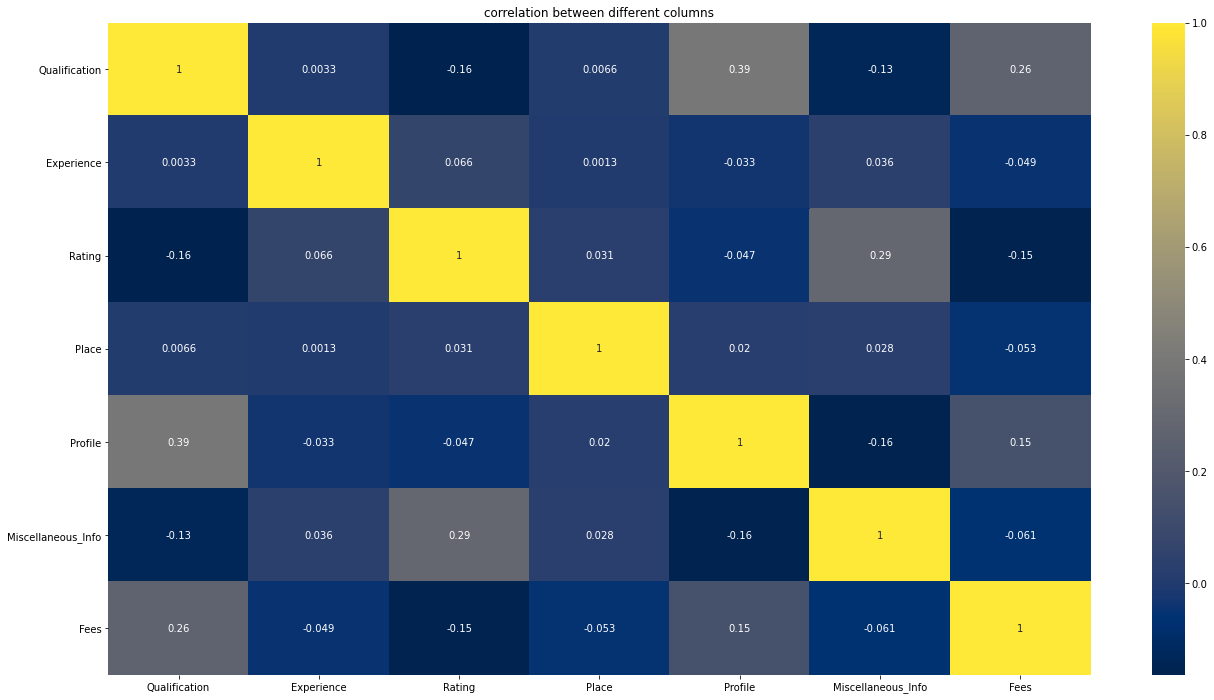

In [35]:
# Let's see the correlation between different columns.
corr_df= df.corr()

plt.figure(figsize=[22,12])
sns.heatmap(corr_df,cmap="cividis",annot=True)
plt.title('correlation between different columns')
plt.show()

>From the above heatmap we can see that 'Qualification' is the highest positively correlated column with the 'fees' column.

>We can observe that 'Place' is the most least negatively correlated column with the 'fees' column.

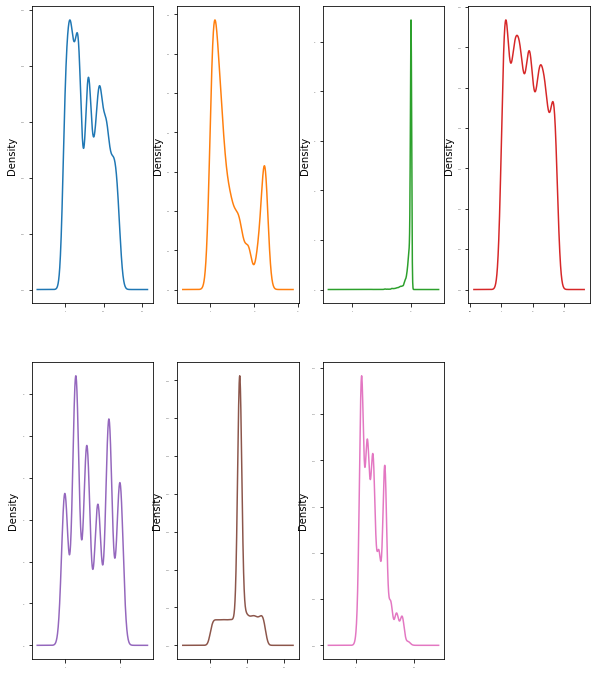

In [36]:
df.plot(kind='density',subplots=True,  layout=(2,4), sharex=False, legend=False, fontsize=1, figsize=(10,12))
plt.show()

In [37]:
df.skew()

Qualification         0.239720
Experience            0.823531
Rating               -4.701646
Place                 0.124862
Profile               0.108803
Miscellaneous_Info   -0.218460
Fees                  0.751870
dtype: float64

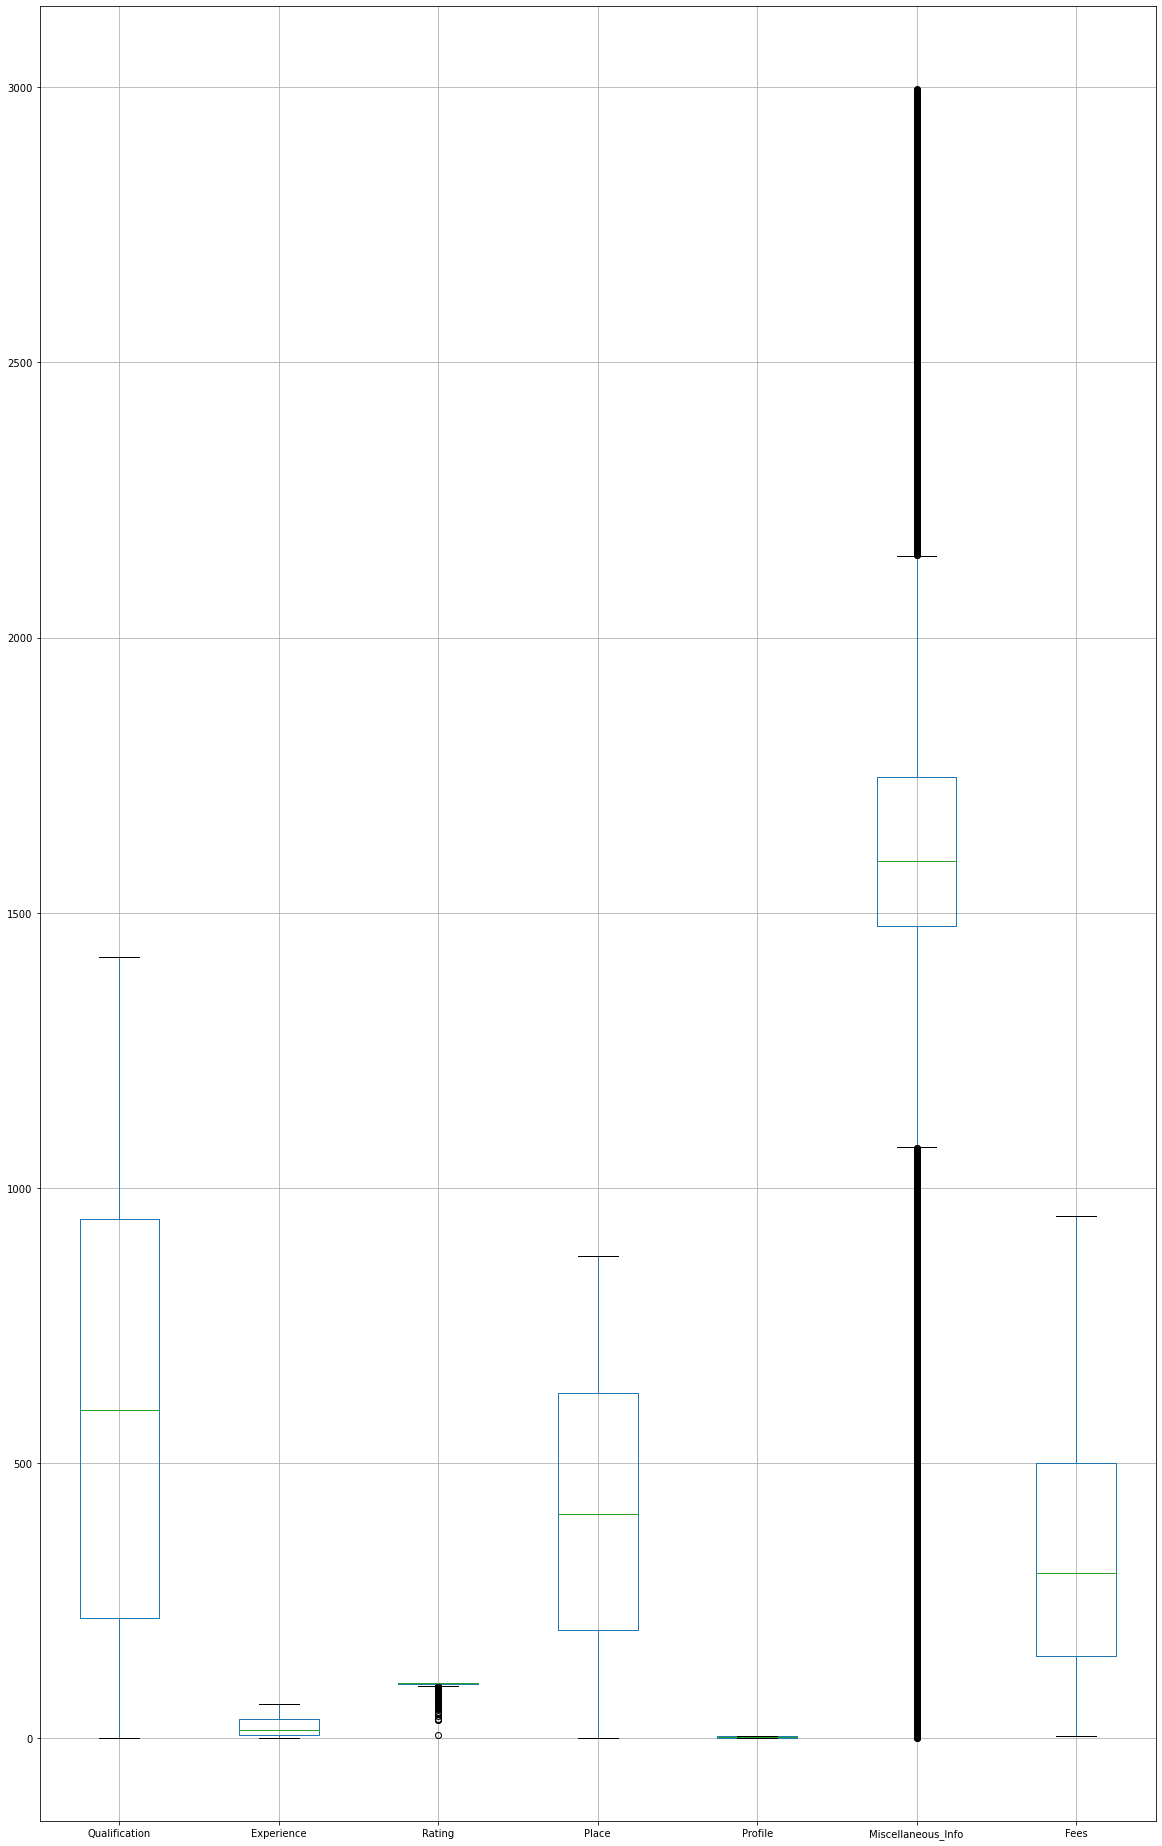

In [38]:
#checking the outliers
df.iloc[:,0:10].boxplot(figsize=[20,40])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [39]:
skew=df.columns

for i in skew:
    if df.skew().loc[i]>0.5:
        df[i]=np.log1p(df[i])

In [40]:
df.skew()

Qualification         0.239720
Experience           -0.362028
Rating               -4.701646
Place                 0.124862
Profile               0.108803
Miscellaneous_Info   -0.218460
Fees                 -0.298173
dtype: float64

In [41]:
#splitting the dataset into independent and target variables in x and y respectively

x=df.drop(['Fees','Miscellaneous_Info'], axis=1)
y=df['Fees']

### Model Building

In [42]:
#checking the best random state
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f"At random state {i}, the training accuracy is:- {r2_score(y_train,pred_train)}")
    print(f"At random state {i}, the testing accuracy is:- {r2_score(y_test,pred_test)}")
    print("\n")

At random state 0, the training accuracy is:- 0.0732751212288123
At random state 0, the testing accuracy is:- 0.0892986568011207


At random state 1, the training accuracy is:- 0.07487386969664434
At random state 1, the testing accuracy is:- 0.08459646891685901


At random state 2, the training accuracy is:- 0.08048291642217587
At random state 2, the testing accuracy is:- 0.06095821689390235


At random state 3, the training accuracy is:- 0.07945588793574654
At random state 3, the testing accuracy is:- 0.06625278821648917


At random state 4, the training accuracy is:- 0.07668950407423814
At random state 4, the testing accuracy is:- 0.07729504831653766


At random state 5, the training accuracy is:- 0.07710098668512344
At random state 5, the testing accuracy is:- 0.07552990994317277


At random state 6, the training accuracy is:- 0.07870275529824045
At random state 6, the testing accuracy is:- 0.06576070106923582


At random state 7, the training accuracy is:- 0.07949182546062405
At ra

At random state 62, the training accuracy is:- 0.07495699897038555
At random state 62, the testing accuracy is:- 0.08358715588505994


At random state 63, the training accuracy is:- 0.07372821767315152
At random state 63, the testing accuracy is:- 0.08978092788429437


At random state 64, the training accuracy is:- 0.07606994558318403
At random state 64, the testing accuracy is:- 0.07720165056398987


At random state 65, the training accuracy is:- 0.07626255462037268
At random state 65, the testing accuracy is:- 0.0783906004139131


At random state 66, the training accuracy is:- 0.0820759514545677
At random state 66, the testing accuracy is:- 0.05434775319047158


At random state 67, the training accuracy is:- 0.07269583449652772
At random state 67, the testing accuracy is:- 0.09346157875873695


At random state 68, the training accuracy is:- 0.07408045957002973
At random state 68, the testing accuracy is:- 0.08750961607804031


At random state 69, the training accuracy is:- 0.07633671

At random state 125, the testing accuracy is:- 0.09467743951756313


At random state 126, the training accuracy is:- 0.08307384785436278
At random state 126, the testing accuracy is:- 0.048702346986609024


At random state 127, the training accuracy is:- 0.07733295515226746
At random state 127, the testing accuracy is:- 0.07302597936009392


At random state 128, the training accuracy is:- 0.07656965926118964
At random state 128, the testing accuracy is:- 0.07692138339695287


At random state 129, the training accuracy is:- 0.0818161023268783
At random state 129, the testing accuracy is:- 0.05517646977915258


At random state 130, the training accuracy is:- 0.07594368656759687
At random state 130, the testing accuracy is:- 0.0809629296675678


At random state 131, the training accuracy is:- 0.07776912557172644
At random state 131, the testing accuracy is:- 0.07352520236724958


At random state 132, the training accuracy is:- 0.08076609646577859
At random state 132, the testing accuracy 

At random state 188, the testing accuracy is:- 0.06996944772970992


At random state 189, the training accuracy is:- 0.08045810847028245
At random state 189, the testing accuracy is:- 0.06236055987225575


At random state 190, the training accuracy is:- 0.0771287384557332
At random state 190, the testing accuracy is:- 0.07602623561994948


At random state 191, the training accuracy is:- 0.07994829071129783
At random state 191, the testing accuracy is:- 0.06409937394799747


At random state 192, the training accuracy is:- 0.07596614636914989
At random state 192, the testing accuracy is:- 0.07946101771950509


At random state 193, the training accuracy is:- 0.07836850587973687
At random state 193, the testing accuracy is:- 0.07076253564576707


At random state 194, the training accuracy is:- 0.07837556384194477
At random state 194, the testing accuracy is:- 0.06994299080618993


At random state 195, the training accuracy is:- 0.07736005326591666
At random state 195, the testing accuracy 

>From the above stats we can see that at random state 27, the testing accuracy and the training accuracy is highest.

>Now testing the best random state in different algorithms

In [43]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=27)

In [44]:
model=[LinearRegression(),SVR(),RandomForestRegressor(),DecisionTreeRegressor(),KernelRidge()]

In [45]:
for n in model:
    n.fit(x_train,y_train)
    n.score(x_train,y_train)
    predm=n.predict(x_test)
    print('r2_score of',n,'is')
    print(r2_score(y_test,predm))
    print(mean_squared_error(y_test,predm))
    print(mean_absolute_error(y_test,predm))
    print('\n')

r2_score of LinearRegression() is
0.10489956633992215
0.40425528522822884
0.5194467101078235


r2_score of SVR() is
0.08455212683019353
0.41344482380216857
0.5153985562547364


r2_score of RandomForestRegressor() is
0.164705523475685
0.377245048889268
0.4916910513666195


r2_score of DecisionTreeRegressor() is
-0.540090672246271
0.695553002293243
0.6279887044276722


r2_score of KernelRidge() is
-0.2700419395448703
0.5735905684048642
0.596164137069342




>Now checking the Cross Validation Score to check whether our models are overfitted or underfitted

In [46]:
scrli=cross_val_score(LinearRegression(),x,y,cv=5)
print('cross validation score of linear regression: ',scrli.mean())

cross validation score of linear regression:  0.07356676993402415


In [47]:
scrkr=cross_val_score(KernelRidge(),x,y,cv=5)
print('cross validation score of KrenelRidgeRegressor: ',scrkr.mean())

cross validation score of KrenelRidgeRegressor:  -0.2360490575097398


In [48]:
scrrf=cross_val_score(RandomForestRegressor(),x,y, cv=5)
print('cross validation score of RandomForestregression: ',scrrf.mean())

cross validation score of RandomForestregression:  0.1361184435423774


In [49]:
scrdtr=cross_val_score(DecisionTreeRegressor(),x,y, cv=5)
print('cross validation score of DecisionTreeregression: ',scrdtr.mean())

cross validation score of DecisionTreeregression:  -0.542682365017549


In [50]:
scrsvr=cross_val_score(SVR(),x,y, cv=5)
print('cross validation score of SVR: ',scrsvr.mean())

cross validation score of SVR:  0.06451318541588184


>Minimum difference in r2_score and cross validation score is for RandomForestREgressor. So it is our best model

>Doing GridSearchCV for getting best parameters

In [51]:
#creating parameter list to pass in GridSearchCV
param_grid = { 'bootstrap': [True], 'max_depth': [5, 10, None], 'max_features': ['auto', 'log2'], 'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15],}

In [52]:
GCV=GridSearchCV(RandomForestRegressor(),param_grid,cv=5)

In [53]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True], 'max_depth': [5, 10, None],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]})

In [54]:
#getting the best parameters found by GridSearchCV
GCV.best_params_

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'auto',
 'n_estimators': 13}

In [55]:
GCV_pred=GCV.best_estimator_.predict(x_test)

In [56]:
r2_score(y_test,GCV_pred)

0.17348821427120398

In [57]:
joblib.dump(GCV.best_estimator_,'Doctor_consultation_fees.obj')

['Doctor_consultation_fees.obj']

>Using the test Dataset

In [58]:
#loading the test data
test_df=pd.read_csv('doctor_test.csv')

In [59]:
test_df

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...
...,...,...,...,...,...,...
1982,"BAMS, Doctor of Medicine",10 years experience,NaN,"Basavanagudi, Bangalore",Ayurveda,NaN
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4 years experience,NaN,"Choolai, Chennai",Dermatologists,NaN
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9 years experience,NaN,"Porur, Chennai",General Medicine,NaN
1985,BDS,12 years experience,98%,"Arekere, Bangalore",Dentist,RCT - Root Canal Treatment Root Canal Treatmen...


In [60]:
#checking the data dimension
test_df.shape

(1987, 6)

In [61]:
#checking the null values in the dataset
test_df.isnull().sum()

Qualification            0
Experience               0
Rating                1090
Place                    6
Profile                  0
Miscellaneous_Info     834
dtype: int64

In [62]:
test_df['Rating'] = test_df['Rating'].fillna(test_df['Rating'].mode()[0])

In [63]:
test_df['Place'] = test_df['Place'].fillna(test_df['Place'].mode()[0])

In [64]:
test_df=test_df.drop('Miscellaneous_Info', axis=1)

In [65]:
test_df.isnull().sum()

Qualification    0
Experience       0
Rating           0
Place            0
Profile          0
dtype: int64

In [67]:
test_df['Rating'] = list(map(lambda x: x[:-1], test_df['Rating'].values))

In [68]:
test_df['Rating'] = [float(x) for x in test_df['Rating'].values]

In [69]:
enc=OrdinalEncoder()

for i in test_df.columns:
    if test_df[i].dtypes=='object':
        test_df[i]=enc.fit_transform(test_df[i].values.reshape(-1,1))

In [70]:
test_df

,Qualification,Experience,Rating,Place,Profile
0,241.0,28.0,100.0,142.0,4.0
1,340.0,24.0,100.0,580.0,3.0
2,258.0,34.0,70.0,212.0,2.0
3,6.0,0.0,100.0,374.0,0.0
4,79.0,7.0,100.0,231.0,1.0
...,...,...,...,...,...
1982,17.0,1.0,100.0,58.0,0.0
1983,548.0,33.0,100.0,96.0,2.0
1984,474.0,56.0,100.0,424.0,4.0
1985,51.0,3.0,98.0,26.0,1.0


In [76]:
test_df.dtypes

Qualification    float64
Experience       float64
Rating           float64
Place            float64
Profile          float64
dtype: object

In [71]:
test_df.skew()

Qualification    0.280822
Experience       0.687595
Rating          -3.824326
Place            0.046487
Profile          0.028926
dtype: float64

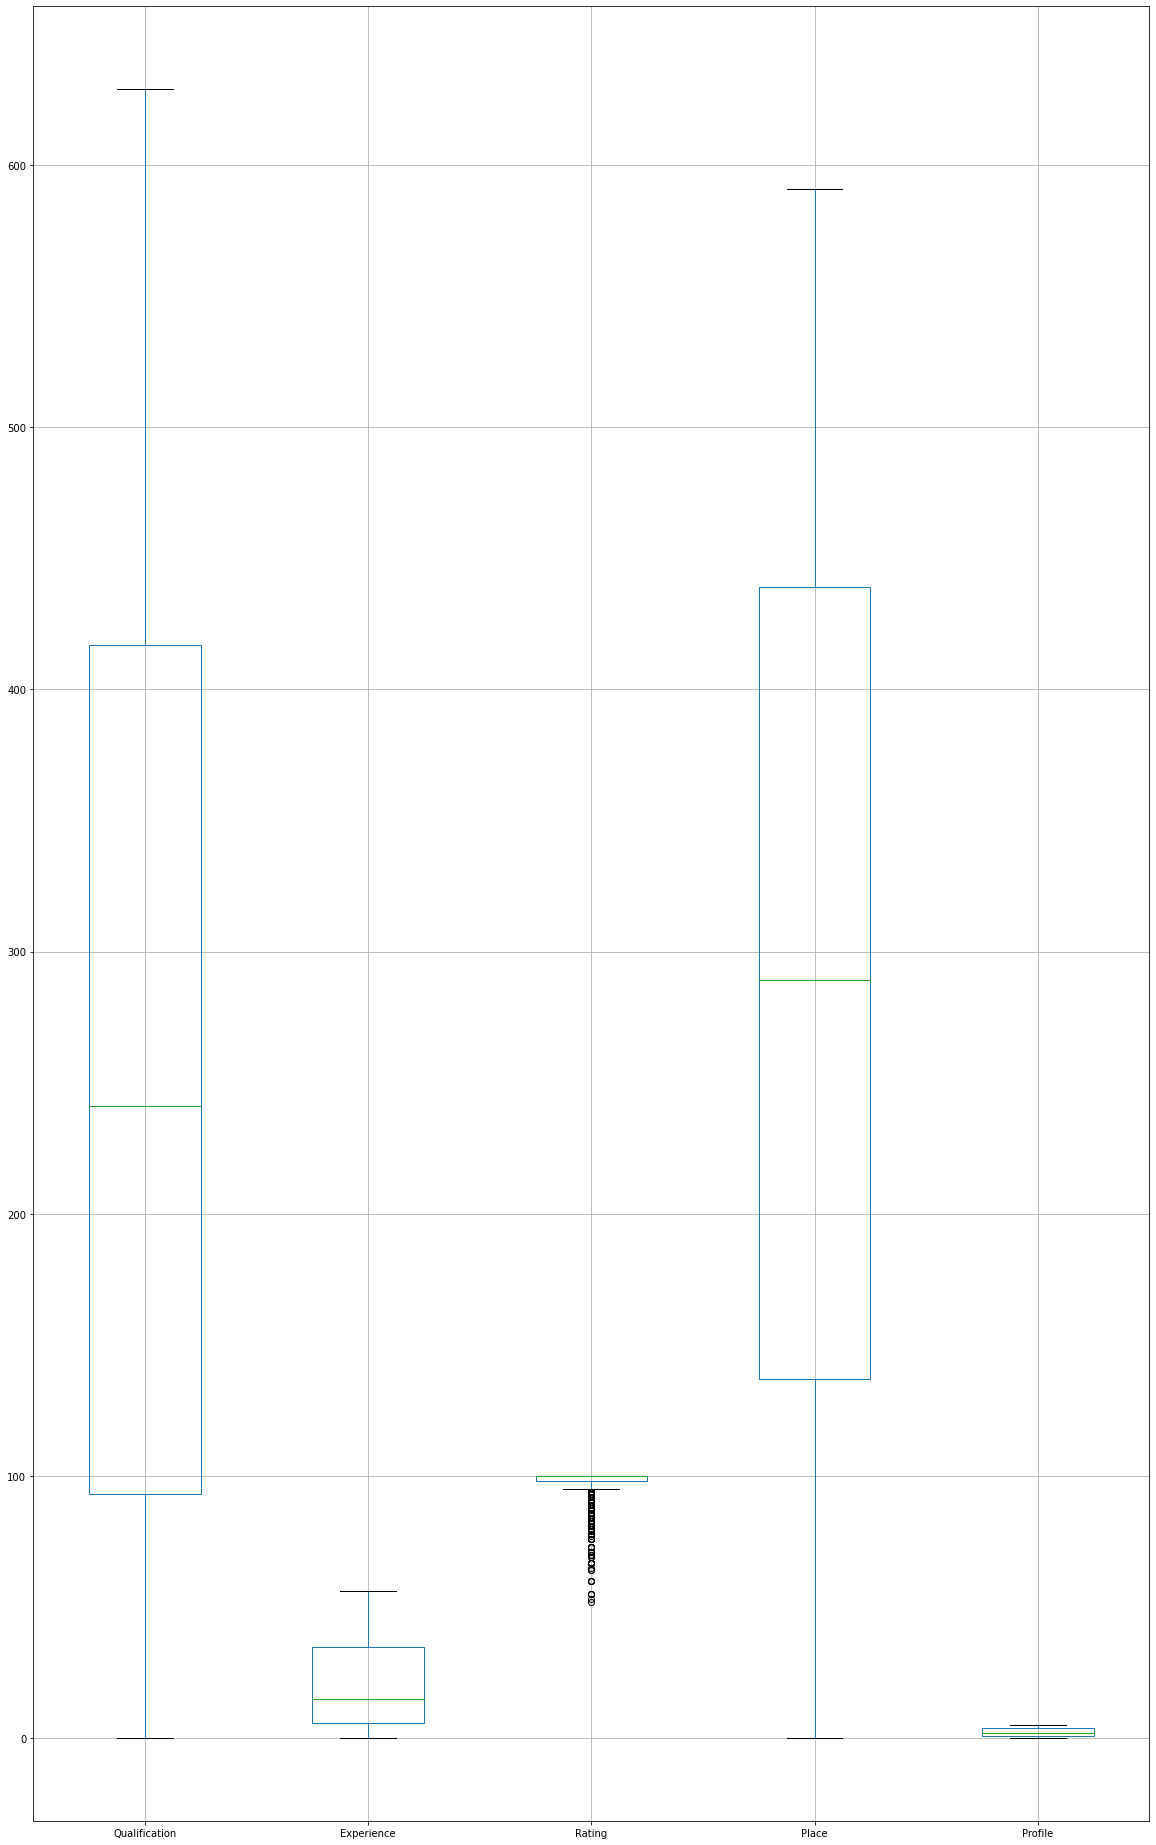

In [73]:
#checking the outliers
test_df.iloc[:,0:10].boxplot(figsize=[20,40])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [74]:
skew=test_df.columns

for i in skew:
    if test_df.skew().loc[i]>0.5:
        test_df[i]=np.log1p(test_df[i])

In [75]:
test_df.skew()

Qualification    0.280822
Experience      -0.474469
Rating          -3.824326
Place            0.046487
Profile          0.028926
dtype: float64

In [77]:
#loading the model
model=joblib.load('Doctor_consultation_fees.obj')

In [78]:
model

RandomForestRegressor(max_depth=10, n_estimators=13)

In [79]:
predictions=model.predict(test_df)

In [87]:
pd.set_option('display.max_rows', None)

In [88]:
predictions

array([5.76851828, 5.56106011, 5.70177235, ..., 5.60901124, 5.4468118 ,
       5.47517529])

In [89]:
prediction=pd.DataFrame(predictions,columns=['prediction'])

In [90]:
prediction

,prediction
0,5.768518
1,5.561060
2,5.701772
3,4.717314
4,5.284164
5,5.940168
6,5.429567
7,5.577778
8,5.867426
9,5.097374
